In [6]:
import pandas as pd
import numpy as np

import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
%matplotlib inline

In [125]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [8]:
data = pd.read_csv('total_dataset.csv')
data.head()

,운행일자,요일,열차번호,역,출도착구분,역간소요시간,급행여부,환승가능,출발행,종착행,...,현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조 QC플래그,전운량(10분위),중하층운량(10분위),시정(10m),지면온도(°C),지면온도 QC플래그
0,20191101,금,K1907,수원,정차,7.0,1,2,용산,천안,...,1025.3,0.0,1029.5,0.0,0.0,0.0,0.0,1195.0,11.5,0.0
1,20191101,금,K1907,수원,정차,7.0,1,2,용산,천안,...,1025.3,0.0,1029.5,0.0,0.0,0.0,0.0,1195.0,11.5,0.0
2,20191101,금,K1907,수원,정차,7.0,1,2,용산,천안,...,1025.3,0.0,1029.5,0.0,0.0,0.0,0.0,1195.0,11.5,0.0
3,20191101,금,K1907,수원,정차,7.0,1,2,용산,천안,...,1025.3,0.0,1029.5,0.0,0.0,0.0,0.0,1195.0,11.5,0.0
4,20191101,금,K1907,세류,통과,2.5,1,0,용산,천안,...,1025.3,0.0,1029.5,0.0,0.0,0.0,0.0,1195.0,11.5,0.0


In [33]:
# train 데이터만 가져오기
data = data[data['운행일자'] <= 20191124]

In [17]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
plt.rcParams['axes.unicode_minus'] = False

plt.rcParams['font.family'] = 'Gulim'
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams["font.family"]

['Gulim']

# 지연

지연이란, 실제도착시간 - 계획도착시간 $>=$ 1분

In [34]:
data['지연여부'].value_counts()

True     4336221
False    2264620
Name: 지연여부, dtype: int64

C:\Users\seung\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


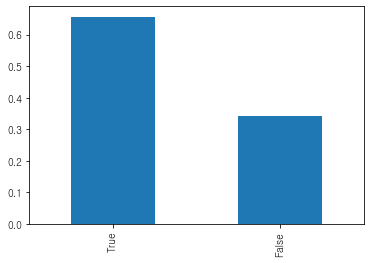

In [35]:
data['지연여부'].value_counts(normalize = True).plot('bar')

지연이 일어나는 경우가 지연이 아닌 경우보다 많다 --> 불균형 데이터

# 요일과 지연

- 요일 vs 총 지연수

C:\Users\seung\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


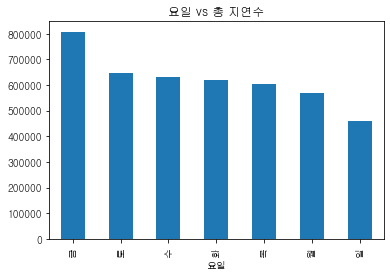

In [36]:
data.groupby('요일')['지연여부'].sum().sort_values(ascending = False).plot('bar', title = '요일 vs 총 지연수')

- 요일 vs 지연 비율

C:\Users\seung\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


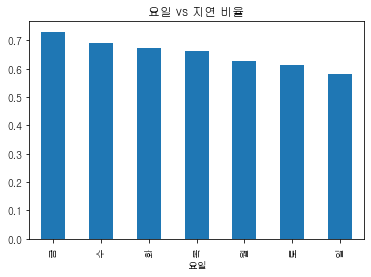

In [37]:
(data.groupby(['요일'])['지연여부'].sum().sort_index()/data['요일'].value_counts().sort_index()).sort_values(ascending = False)[:50].plot('bar', title = '요일 vs 지연 비율')

총 지연수와 지연 비율을 살펴본 결과 주중의 마지막날인 금요일에 지연이 많이 일어나는 것을 확인할 수 있었다.

금요일과 반대로 한주의 시작을 알리는 '월요일'은 상대적으로 적음을 알 수 있다.

- 모자이크 플랏

(<Figure size 432x288 with 3 Axes>,
 OrderedDict([(('금', 'True'),
               (0.0, 0.0, 0.16265035413117696, 0.7281310794269104)),
              (('금', 'False'),
               (0.0,
                0.7314533385631229,
                0.16265035413117696,
                0.26854666143687694)),
              (('토', 'True'),
               (0.16750472306321582,
                0.0,
                0.15510321343680852,
                0.6101303702994822)),
              (('토', 'False'),
               (0.16750472306321582,
                0.6134526294356948,
                0.15510321343680852,
                0.38654737056430505)),
              (('일', 'True'),
               (0.32746230543206317,
                0.0,
                0.11592271024870571,
                0.5797588640201695)),
              (('일', 'False'),
               (0.32746230543206317,
                0.5830811231563822,
                0.11592271024870571,
                0.4169188768436178)),
              ((

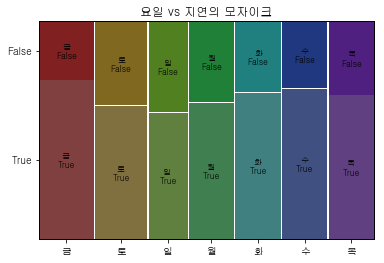

In [67]:
mosaic(data, ['요일', '지연여부'], title='요일 vs 지연의 모자이크')

### 요일이 지연여부에 영향을 주는가?

In [126]:
glm_fit = smf.glm(formula='지연여부 ~ 요일', data=data, family=sm.families.Binomial()).fit()
print(glm_fit.summary())

                       Generalized Linear Model Regression Results                       
Dep. Variable:     ['지연여부[False]', '지연여부[True]']   No. Observations:              6600841
Model:                                       GLM   Df Residuals:                  6600834
Model Family:                           Binomial   Df Model:                            6
Link Function:                             logit   Scale:                          1.0000
Method:                                     IRLS   Log-Likelihood:            -4.2120e+06
Date:                           Mon, 06 Apr 2020   Deviance:                   8.4241e+06
Time:                                   13:22:40   Pearson chi2:                 6.60e+06
No. Iterations:                                7                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

요일이 지연여부에 영향을 주는 것으로 보인다

# 열차번호와 지연

- 열차번호 vs 총 지연수

C:\Users\seung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


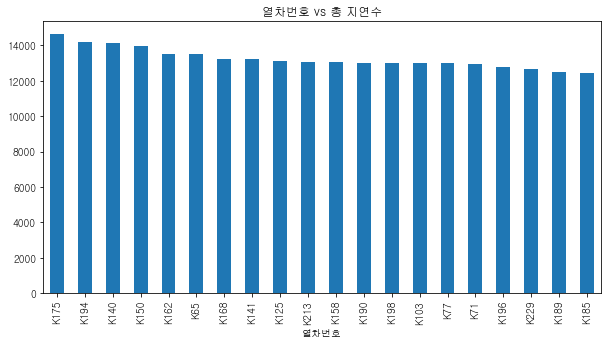

In [38]:
plt.figure(figsize = (10,5))
data.groupby('열차번호')['지연여부'].sum().sort_values(ascending = False)[:20].plot('bar', title = '열차번호 vs 총 지연수')

- 열차번호 vs 지연 비율

C:\Users\seung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


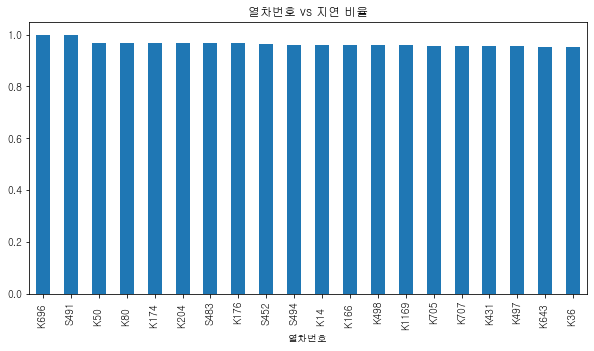

In [21]:
plt.figure(figsize = (10,5))
(data.groupby(['열차번호'])['지연여부'].sum().sort_index()/data['열차번호'].value_counts().sort_index()).sort_values(ascending = False)[:20].plot('bar', title = '열차번호 vs 지연 비율')

지연 비율이 높은 순으로 20개를 나열

그래프를 살펴보면 20개의 열차에서 지연 비율이 0.9이상임을 확인

- 열차번호의 지연비율에 대한 히스토그램

In [39]:
data['열차번호'].nunique()

1237

C:\Users\seung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  


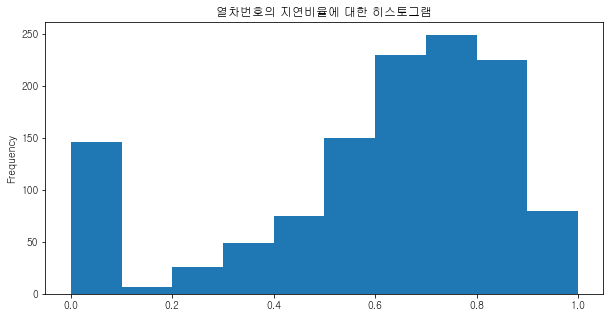

In [47]:
plt.figure(figsize = (10,5))
(data.groupby(['열차번호'])['지연여부'].sum().sort_index()/data['열차번호'].value_counts().sort_index()).sort_values(ascending = False).plot('hist', title = '열차번호의 지연비율에 대한 히스토그램')

각 열차번호마다 지연되는 비율이 대체적으로 높은 편

열차번호가 지연에 영향을 줄 것으로 보임

# 역과 지연

- 역 vs 총 지연수

C:\Users\seung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


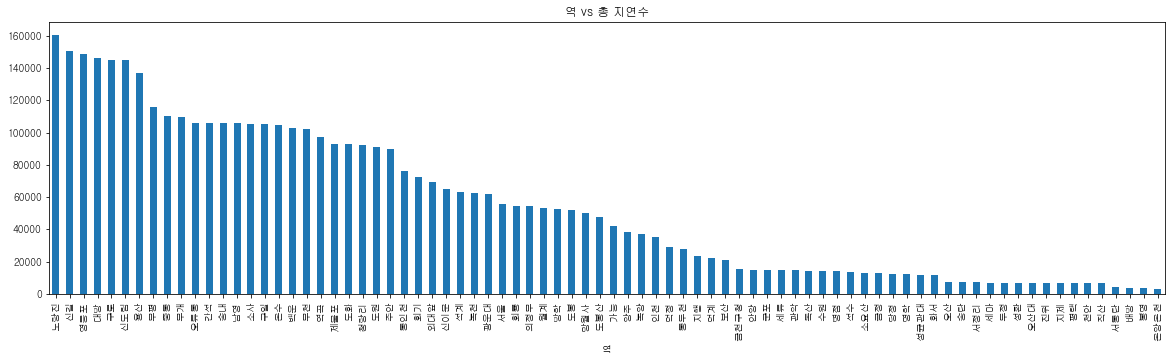

In [46]:
plt.figure(figsize = (20,5))
data.groupby('역')['지연여부'].sum().sort_values(ascending = False).plot('bar', title = '역 vs 총 지연수')

- 역 vs 지연 비율

C:\Users\seung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


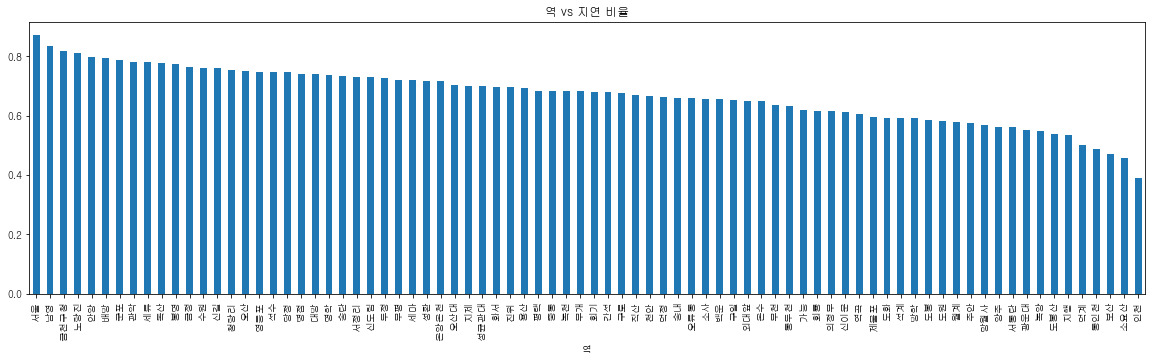

In [48]:
plt.figure(figsize = (20,5))
(data.groupby(['역'])['지연여부'].sum().sort_index()/data['역'].value_counts().sort_index()).sort_values(ascending = False).plot('bar', title = '역 vs 지연 비율')

총지연수로 살펴보면 인천에서 용산 구간에서, 지연비율로 살펴보면 신창에서 서울 구간에서 많이 발생

# 역간소요시간과 지연

Text(0.5, 1.0, '역간소요시간 vs 지연여부')

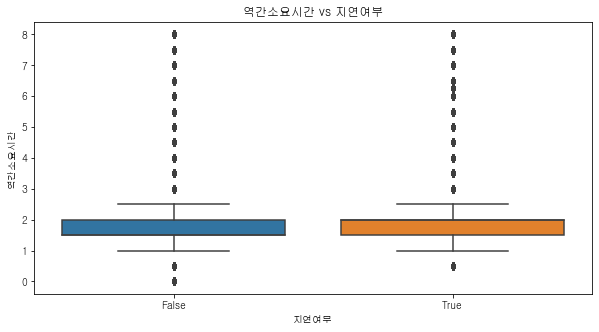

In [53]:
plt.figure(figsize = (10,5))
sns.boxplot(y = data['역간소요시간'], x = data['지연여부'])
plt.title('역간소요시간 vs 지연여부')

### 역간소요시간이 지연여부에 영향을 주는가?

In [98]:
delay1 = data.loc[data['지연여부'] == 1, '역간소요시간']
delay0 = data.loc[data['지연여부'] == 0, '역간소요시간']

In [99]:
delay1

0          7.0
1          7.0
2          7.0
3          7.0
4          2.5
          ... 
7313680    2.5
7313681    2.5
7313682    2.5
7313683    2.5
7313684    2.5
Name: 역간소요시간, Length: 4336221, dtype: float64

In [100]:
delay0

16         2.5
17         2.5
18         2.5
19         2.5
20         3.0
          ... 
7313072    1.5
7313073    1.5
7313074    1.5
7313075    1.5
7313076    1.5
Name: 역간소요시간, Length: 2264620, dtype: float64

- 등분산 검정

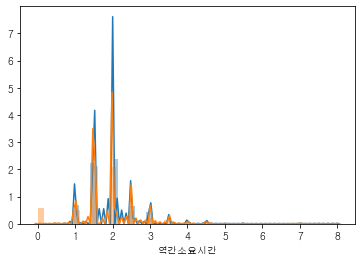

In [101]:
sns.distplot(delay1)
sns.distplot(delay0)

In [75]:
stats.bartlett(delay1, delay0)

BartlettResult(statistic=118774.3293251334, pvalue=0.0)

In [76]:
stats.levene(delay1, delay0)

LeveneResult(statistic=54607.76077863962, pvalue=0.0)

등분산을 만족하지 않음

- t-test

대립가설: 역간소요시간이 지연여부에 영향을 줄 것이다.

귀무가설: 역간소요시간이 지연여부에 영향을 주지 않는다.

In [78]:
result = stats.ttest_ind(delay1, delay0, equal_var=False) 
print('t statistic : %.3f \np-value : %.3f' % (result))

t statistic : 332.846 
p-value : 0.000


귀무가설을 기각하므로, 역간소요시간이 지연여부에 어느정도 영향을 준다.

# 급행여부와 지연

In [51]:
data['급행여부'].value_counts()

0    4767044
1    1833797
Name: 급행여부, dtype: int64

(<Figure size 432x288 with 3 Axes>,
 OrderedDict([(('1', 'True'),
               (0.0, 0.0, 0.27643047784983704, 0.6158938271202834)),
              (('1', 'False'),
               (0.0,
                0.6192160862564959,
                0.27643047784983704,
                0.38078391374350395)),
              (('0', 'True'),
               (0.2814056022279465,
                0.0,
                0.7185943977720536,
                0.6696793018219296)),
              (('0', 'False'),
               (0.2814056022279465,
                0.6730015609581422,
                0.7185943977720536,
                0.3269984390418577))]))

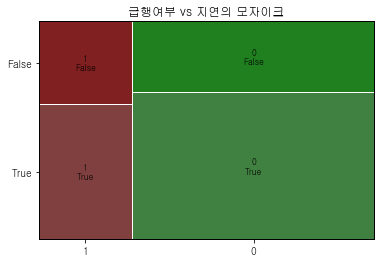

In [79]:
mosaic(data, ['급행여부', '지연여부'], title='급행여부 vs 지연의 모자이크')

### 급행여부가 지연여부에 영향을 주는가?

In [127]:
glm_fit = smf.glm(formula='지연여부 ~ 급행여부', data=data, family=sm.families.Binomial()).fit()
print(glm_fit.summary())

                       Generalized Linear Model Regression Results                       
Dep. Variable:     ['지연여부[False]', '지연여부[True]']   No. Observations:              6600841
Model:                                       GLM   Df Residuals:                  6600839
Model Family:                           Binomial   Df Model:                            1
Link Function:                             logit   Scale:                          1.0000
Method:                                     IRLS   Log-Likelihood:            -4.2363e+06
Date:                           Mon, 06 Apr 2020   Deviance:                   8.4725e+06
Time:                                   13:24:17   Pearson chi2:                 6.60e+06
No. Iterations:                                5                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

# 환승가능과 지연

환승가능이란, 해당 역에서 환승가능한 역의 수

Text(0.5, 1.0, '환승가능 vs 지연여부')

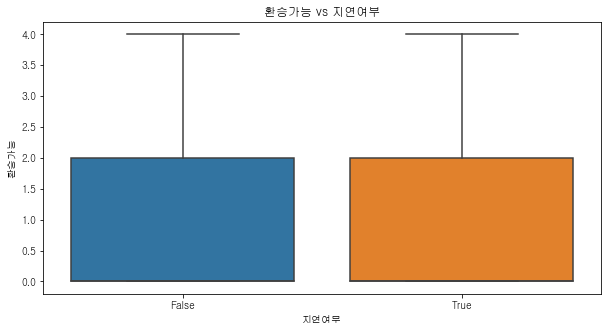

In [55]:
plt.figure(figsize = (10,5))
sns.boxplot(y = data['환승가능'], x = data['지연여부'])
plt.title('환승가능 vs 지연여부')

### 환승가능이 지연여부에 영향을 주는가?

In [102]:
delay1 = data.loc[data['지연여부'] == 1, '환승가능']
delay0 = data.loc[data['지연여부'] == 0, '환승가능']

In [103]:
delay1

0          2
1          2
2          2
3          2
4          0
          ..
7313680    0
7313681    0
7313682    0
7313683    0
7313684    0
Name: 환승가능, Length: 4336221, dtype: int64

In [104]:
delay0

16         0
17         0
18         0
19         0
20         0
          ..
7313072    3
7313073    3
7313074    3
7313075    3
7313076    3
Name: 환승가능, Length: 2264620, dtype: int64

- 등분산 검정

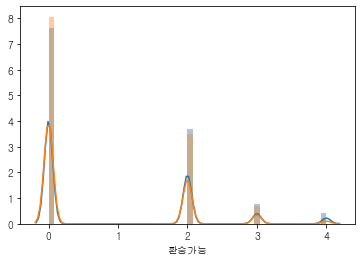

In [105]:
sns.distplot(delay1)
sns.distplot(delay0)

In [106]:
stats.bartlett(delay1, delay0)

BartlettResult(statistic=13486.24549556141, pvalue=0.0)

In [107]:
stats.levene(delay1, delay0)

LeveneResult(statistic=13182.974338168915, pvalue=0.0)

등분산을 만족하지 않음

- t-test

대립가설: 환승가능이 지연여부에 영향을 줄 것이다.

귀무가설: 환승가능이 지연여부에 영향을 주지 않는다.

In [108]:
result = stats.ttest_ind(delay1, delay0, equal_var=False) 
print('t statistic : %.3f \np-value : %.3f' % (result))

t statistic : 117.284 
p-value : 0.000


귀무가설을 기각하므로, 환승가능이 지연여부에 어느정도 영향을 준다.

# 출발행과 지연

- 출발행 vs 총 지연수

C:\Users\seung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


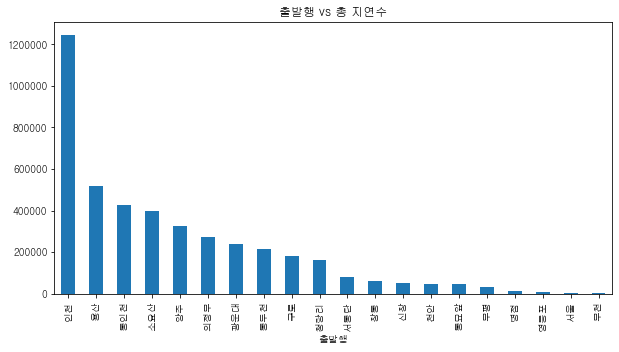

In [56]:
plt.figure(figsize = (10,5))
data.groupby(['출발행'])['지연여부'].sum().sort_values(ascending = False).plot('bar', title = '출발행 vs 총 지연수')

- 출발행 vs 지연 비율

C:\Users\seung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


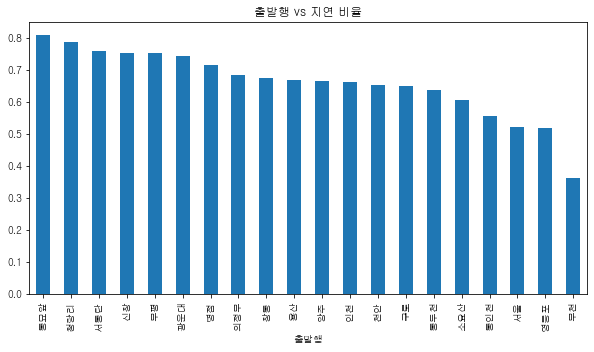

In [58]:
plt.figure(figsize = (10,5))
(data.groupby(['출발행'])['지연여부'].sum().sort_index()/data['출발행'].value_counts().sort_index()).sort_values(ascending = False).plot('bar', title = '출발행 vs 지연 비율')

인천, 경기지역에서 서울로 올라오는 열차에서 지연이 많이 일어남

### 출발행이 지연여부에 영향을 주는가?

In [130]:
glm_fit = smf.glm(formula='지연여부 ~ 출발행', data=data, family=sm.families.Binomial()).fit()
print(glm_fit.summary())

                       Generalized Linear Model Regression Results                       
Dep. Variable:     ['지연여부[False]', '지연여부[True]']   No. Observations:              6600841
Model:                                       GLM   Df Residuals:                  6600821
Model Family:                           Binomial   Df Model:                           19
Link Function:                             logit   Scale:                          1.0000
Method:                                     IRLS   Log-Likelihood:            -4.1990e+06
Date:                           Mon, 06 Apr 2020   Deviance:                   8.3980e+06
Time:                                   13:30:49   Pearson chi2:                 6.60e+06
No. Iterations:                                5                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

출발행이 지연여부에 영향을 주는 것으로 보인다

# 종착행과 지연

- 종착행 vs 총 지연수

C:\Users\seung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


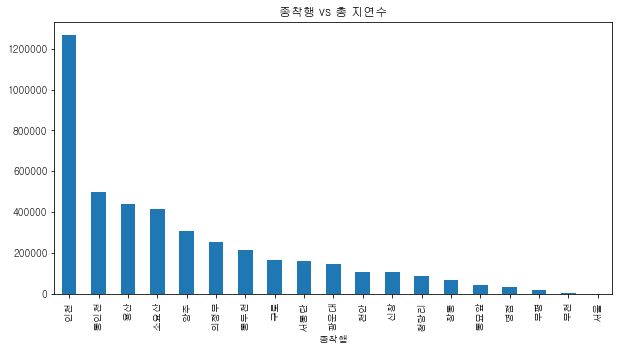

In [59]:
plt.figure(figsize = (10,5))
data.groupby(['종착행'])['지연여부'].sum().sort_values(ascending = False).plot('bar', title = '종착행 vs 총 지연수')

- 종착행 vs 지연 비율

C:\Users\seung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


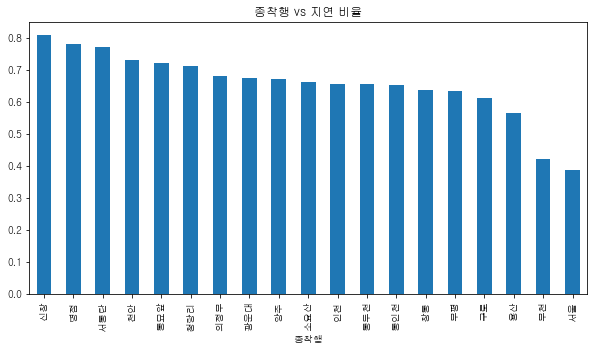

In [60]:
plt.figure(figsize = (10,5))
(data.groupby(['종착행'])['지연여부'].sum().sort_index()/data['종착행'].value_counts().sort_index()).sort_values(ascending = False).plot('bar', title = '종착행 vs 지연 비율')

인천, 경기지역으로 가는 열차에서 지연이 많이 일어남

### 종착행이 지연여부에 영향을 주는가?

In [131]:
glm_fit = smf.glm(formula='지연여부 ~ 종착행', data=data, family=sm.families.Binomial()).fit()
print(glm_fit.summary())

                       Generalized Linear Model Regression Results                       
Dep. Variable:     ['지연여부[False]', '지연여부[True]']   No. Observations:              6600841
Model:                                       GLM   Df Residuals:                  6600822
Model Family:                           Binomial   Df Model:                           18
Link Function:                             logit   Scale:                          1.0000
Method:                                     IRLS   Log-Likelihood:            -4.2095e+06
Date:                           Mon, 06 Apr 2020   Deviance:                   8.4190e+06
Time:                                   13:33:19   Pearson chi2:                 6.60e+06
No. Iterations:                                5                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

종착행 또한 지연여부에 영향을 끼침

# 방향과 지연

(<Figure size 432x288 with 3 Axes>,
 OrderedDict([(('하행', 'True'),
               (0.0, 0.0, 0.5271952980398191, 0.6682609957487745)),
              (('하행', 'False'),
               (0.0,
                0.6715832548849872,
                0.5271952980398191,
                0.3284167451150128)),
              (('상행', 'True'),
               (0.5321704224179287,
                0.0,
                0.4678295775820715,
                0.6394969002448712)),
              (('상행', 'False'),
               (0.5321704224179287,
                0.6428191593810837,
                0.4678295775820715,
                0.3571808406189162))]))

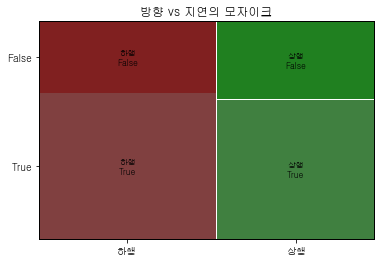

In [69]:
mosaic(data, ['방향', '지연여부'], title='방향 vs 지연의 모자이크')

- 방향이 지연여부에 영향을 주는가

In [128]:
glm_fit = smf.glm(formula='지연여부 ~ 방향', data=data, family=sm.families.Binomial()).fit()
print(glm_fit.summary())

                       Generalized Linear Model Regression Results                       
Dep. Variable:     ['지연여부[False]', '지연여부[True]']   No. Observations:              6600841
Model:                                       GLM   Df Residuals:                  6600839
Model Family:                           Binomial   Df Model:                            1
Link Function:                             logit   Scale:                          1.0000
Method:                                     IRLS   Log-Likelihood:            -4.2417e+06
Date:                           Mon, 06 Apr 2020   Deviance:                   8.4834e+06
Time:                                   13:25:29   Pearson chi2:                 6.60e+06
No. Iterations:                                5                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

상행/하행이 지연여부에 영향을 주는 것으로 판단

# 시간과 지연

- 시간 vs 총 지연수

C:\Users\seung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


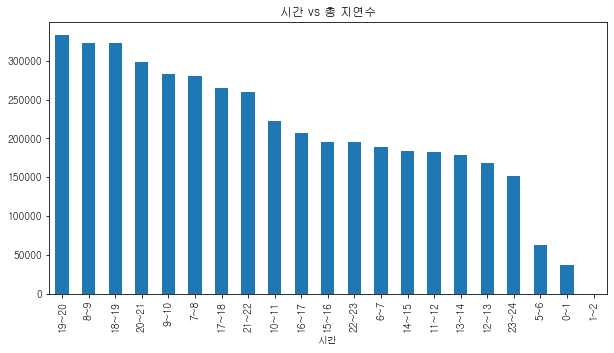

In [65]:
plt.figure(figsize = (10,5))
data.groupby(['시간'])['지연여부'].sum().sort_values(ascending = False).plot('bar', title = '시간 vs 총 지연수')

- 시간 vs 지연 비율

C:\Users\seung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


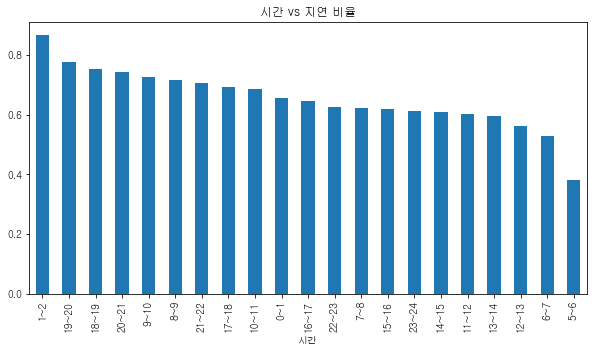

In [66]:
plt.figure(figsize = (10,5))
(data.groupby(['시간'])['지연여부'].sum().sort_index()/data['시간'].value_counts().sort_index()).sort_values(ascending = False).plot('bar', title = '시간 vs 지연 비율')

from 19 to 20, from 18 to 19, from 20 to 21, from 9 to 10, from 8 to 9

대부분 출퇴근 시간에 많이 발생하는 것을 확인


- 모자이크

(<Figure size 432x288 with 3 Axes>,
 OrderedDict([(('11~12', 'True'),
               (0.0, 0.0, 0.04196131977728292, 0.5990115723502568)),
              (('11~12', 'False'),
               (0.0,
                0.6023338314864695,
                0.04196131977728292,
                0.3976661685135305)),
              (('12~13', 'True'),
               (0.04650677432273746,
                0.0,
                0.0413280671356877,
                0.5611460421185579)),
              (('12~13', 'False'),
               (0.04650677432273746,
                0.5644683012547705,
                0.0413280671356877,
                0.4355316987452294)),
              (('13~14', 'True'),
               (0.0923802960038797,
                0.0,
                0.04123923547978754,
                0.5929006827753731)),
              (('13~14', 'False'),
               (0.0923802960038797,
                0.5962229419115856,
                0.04123923547978754,
                0.40377705808841424)

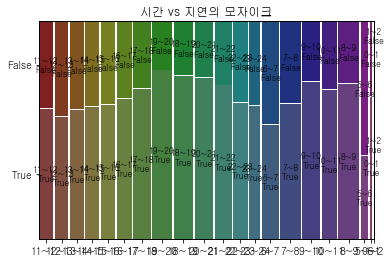

In [68]:
mosaic(data, ['시간', '지연여부'], title='시간 vs 지연의 모자이크')

### 시간이 지연여부에 영향을 주는가?

In [129]:
glm_fit = smf.glm(formula='지연여부 ~ 시간', data=data, family=sm.families.Binomial()).fit()
print(glm_fit.summary())

                       Generalized Linear Model Regression Results                       
Dep. Variable:     ['지연여부[False]', '지연여부[True]']   No. Observations:              6600841
Model:                                       GLM   Df Residuals:                  6600820
Model Family:                           Binomial   Df Model:                           20
Link Function:                             logit   Scale:                          1.0000
Method:                                     IRLS   Log-Likelihood:            -4.1475e+06
Date:                           Mon, 06 Apr 2020   Deviance:                   8.2949e+06
Time:                                   13:28:09   Pearson chi2:                 6.60e+06
No. Iterations:                                5                                         
Covariance Type:                       nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------

상대적으로 출퇴근시간에 많은 영향력이 있음을 알 수 있다

# 기온과 지연

Text(0.5, 1.0, '기온 vs 지연여부')

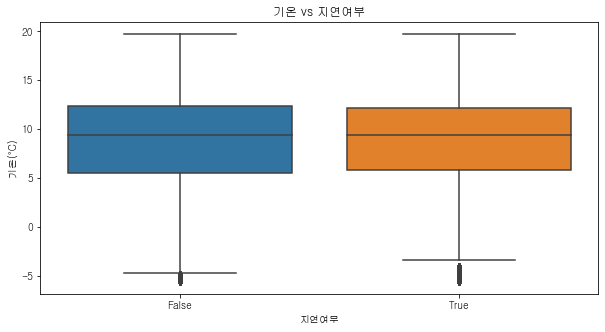

In [64]:
plt.figure(figsize = (10,5))
sns.boxplot(y = data['기온(°C)'], x = data['지연여부'])
plt.title('기온 vs 지연여부')

### 기온이 지연여부에 영향을 주는가?

In [109]:
delay1 = data.loc[data['지연여부'] == 1, '기온(°C)']
delay0 = data.loc[data['지연여부'] == 0, '기온(°C)']

In [110]:
delay1

0          14.5
1          14.5
2          14.5
3          14.5
4          14.5
           ... 
7313680     9.2
7313681     9.2
7313682     9.2
7313683     9.2
7313684     9.2
Name: 기온(°C), Length: 4336221, dtype: float64

In [111]:
delay0

16         14.5
17         14.5
18         14.5
19         14.5
20         14.5
           ... 
7313072     6.9
7313073     6.9
7313074     6.9
7313075     6.9
7313076     6.9
Name: 기온(°C), Length: 2264620, dtype: float64

- 등분산 검정

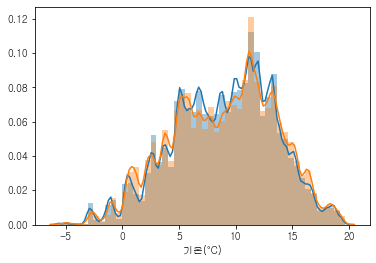

In [112]:
sns.distplot(delay1)
sns.distplot(delay0)

In [113]:
stats.bartlett(delay1, delay0)

BartlettResult(statistic=3977.7847419828095, pvalue=0.0)

In [114]:
stats.levene(delay1, delay0)

LeveneResult(statistic=7006.369083767505, pvalue=0.0)

등분산을 만족하지 않음

- t-test

대립가설: 기온이 지연여부에 영향을 줄 것이다.

귀무가설: 기온이 지연여부에 영향을 주지 않는다.

In [115]:
result = stats.ttest_ind(delay1, delay0, equal_var=False) 
print('t statistic : %.3f \np-value : %.3f' % (result))

t statistic : -5.041 
p-value : 0.000


귀무가설을 기각하므로, 기온이 지연여부에 어느정도 영향을 준다고 할 수 있다